## Libraries

In [14]:
from sklearn import datasets, model_selection

import numpy as np
import matplotlib.pyplot as plt

## SVM 

In [15]:
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

# Dataset


In [16]:
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

clf = SVM(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


## Accuracy

In [17]:

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))


SVM Accuracy:  1.0


# Scatter Plot

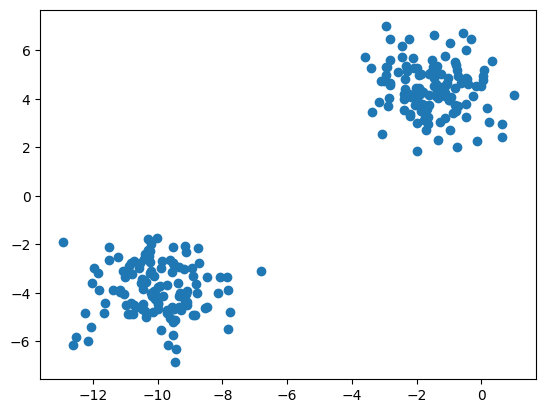

In [18]:
plt.plot(X[:,0],X[:,1],'o')